Epoch 1/100
1/1 [==============================] - 0s 27ms/step - loss: 1.6253 - sparse_categorical_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 1.6180 - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 1.6113 - sparse_categorical_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 1.6049 - sparse_categorical_accuracy: 0.2000
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 1.5985 - sparse_categorical_accuracy: 0.2000

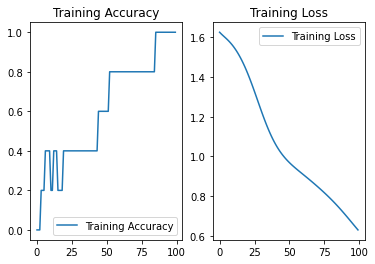

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding
import matplotlib.pyplot as plt
import os

input_word = "abcde"
w_to_id = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}  # 单词映射到数值id的词典

x_train = [w_to_id['a'], w_to_id['b'], w_to_id['c'], w_to_id['d'], w_to_id['e']]
y_train = [w_to_id['b'], w_to_id['c'], w_to_id['d'], w_to_id['e'], w_to_id['a']]

np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

# 使x_train符合Embedding输入要求：[送入样本数， 循环核时间展开步数] ，
# 此处整个数据集送入所以送入，送入样本数为len(x_train)；输入1个字母出结果，循环核时间展开步数为1。
x_train = np.reshape(x_train, (len(x_train), 1))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    Embedding(5, 2),
    SimpleRNN(3),
    Dense(5, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/run_embedding_1pre1.ckpt"

if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss')  # 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])

model.summary()

# print(model.trainable_variables)
file = open('./weights.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

############### predict #############

preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    alphabet = [w_to_id[alphabet1]]
    # 使alphabet符合Embedding输入要求：[送入样本数， 循环核时间展开步数]。
    # 此处验证效果送入了1个样本，送入样本数为1；输入1个字母出结果，循环核时间展开步数为1。
    alphabet = np.reshape(alphabet, (1, 1))
    result = model.predict(alphabet)
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])
